<p align='center'>
  <img width=800  src="https://i0.wp.com/blog.drconsulta.com/wp-content/uploads/2020/03/iStock-1209686026.jpg?resize=1024%2C576&ssl=1">
</p>


Em dezembro de 2019, as autoridades chinesas notificaram o mundo que um vírus estava se espalhando por suas comunidades. Nos meses seguintes, espalhou-se para outros países, com o número de casos dobrando em poucos dias. Este vírus é a Síndrome Respiratória Aguda Grave - Relacionada ao Coronavírus 2 (SARS-CoV-2) que causa a doença chamada Covid-19 e que todo mundo simplesmente chama de Coronavírus.

A Organização Mundial de Saúde (OMS) caracterizou a COVID-19, causada pela SARS-CoV-2, como uma pandemia em 11 de março, enquanto o aumento exponencial do número de casos arriscava-se a sobrecarregar os sistemas de saúde em todo o mundo com uma demanda de leitos de UTI muito acima da capacidade existente, como regiões da Itália sendo exemplos proeminentes.

O Brasil registrou o primeiro caso de SARS-CoV-2 em 26 de fevereiro, e a transmissão do vírus evoluiu apenas de casos importados, para transmissão local e finalmente comunitária muito rapidamente, com o governo federal declarando transmissão comunitária em 20 de março.

Até 27 de março, o estado de São Paulo havia registrado 1.223 casos confirmados de COVID-19, com 68 mortes relacionadas, enquanto o município de São Paulo, com uma população de aproximadamente 12 milhões de pessoas e onde está localizado o Hospital Israelita Albert Einstein, tinha 477 casos confirmados e 30 mortes associadas, até 23 de março. Tanto o estado como o município de São Paulo decidiram estabelecer medidas de quarentena e distanciamento social, que serão aplicadas pelo menos até o início de abril, em um esforço para retardar a disseminação do vírus.

Uma das motivações para este desafio é o fato de que no contexto de um sistema de saúde sobrecarregado com a possível limitação de realizar testes para a detecção do SARS-CoV-2, testar cada caso seria impraticável e os resultados dos testes poderiam ser adiados mesmo que apenas uma subpopulação alvo fosse testada.



**Objetivo**

> Com base nos resultados dos testes laboratoriais normalmente recolhidos para um caso suspeito de COVID-19 durante uma visita à sala de emergência, seria possível prever o resultado do teste para a SARS-Cov-2 (positivo/negativo)?

# Checklist


* Introdução a Análise Explorátoria de Dados e Machine Learning


* Objetivos da Análise Explorátoria de Dados e Machine Learning


* Importando bibliotecas


* Importando dataset


* Analise Exploratoria dos Dados
    * Dimensão do conjunto de dados
    * Visualização do conjunto de dados
    * Propriedades estatísticas do conjunto de dados
    * Lidando com valores ausentes
    * Valores únicos
    * Verificando os tipos de dados das colunas
    * Analise da variavel alvo....
    * Mapa de calor

* Preparação dos dados

* Criando modelo

# Introdução a Análise Explorátoria de Dados e Machine Learning
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto de ciência de dados. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações, padrões e lançar hipóteses.Assim gerando *insights* que auxiliam na criação de modelos de Machine Learning.

Machine Learning é um dos braços da ciência de dados tem como objetivo a construção de sistemas que podem aprender com os dados. Aprender significa ficar melhor em alguma tarefa, dada alguma medida de desempenho. 


Aqui vale a premissa **"Dados melhores superam algoritmos mais sofisticados ..."**



**Objetivos da Análise Explorátoria de Dados**:

O objetivo principal da AED é maximizar a percepção do analista sobre um conjunto de dados e sobre a estrutura subjacente de um conjunto de dados. Fornecendo todos os itens específicos que um analista deseja extrair de um conjunto de dados, como:

* Obter uma visão geral da distribuição do conjunto de dados.
* Verificar se há valores numéricos ausentes, outliers ou outras anomalias no conjunto de dados.
* Descobrir padrões e relacionamentos entre variáveis no conjunto de dados.


**Objetivos do Machine Learning**:

Machine Learing é ótimo para:
* Problemas complexos para os quais não temos solução algorítmica; 
* Substituir uma longa lista de regras ajustadas manualmente; 
* Construir sistemas que se adaptam a ambientes flutuantes;
* Ajudar os humanos a aprender (por exemplo, mineração de dados)


# Importando bibliotecas

In [35]:
# processamento dos dados
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
import missingno as msno 

# visualização
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_style('white')

# machine learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


# Importando dataset

In [2]:
# importando conjunto de dados
covid_df = pd.read_excel('https://dl.dropbox.com/s/bfh2w1ydxz9n4yf/dataset.xlsx?dl=0')


# Análise Explóratoria dos Dados

## Dimensão do conjunto de dados
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 5644 entradas e 111 colunas. Não temos um conjunto de dados muito grande

In [3]:
# dimensão do conjunto de dados
print("DIMENSÃO DO DATASET: ")
print(f"Observações: {covid_df.shape[0]} ")
print(f"Features: {covid_df.shape[1]}")

DIMENSÃO DO DATASET: 
Observações: 5644 
Features: 111


## Visualização do conjunto de dados
Visualizar as 5 entradas desse conjunto de dados nos permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
# verificando as primeiras entrada
covid_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Conclusão iniciais:
* Foi informado que nossos dados foram padronizados para ter uma média de zero e um desvio padrão unitário. Isso reduz uma das etapas quando formos preparar os dados para criar o modelo de machine learning.

* Existe uma coluna `Patient ID`, anônima, que representa um identificador único do paciente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.

* A variável alvo para analisar se o paciente testou positivo ou negativo para covid-19 está na coluna `SARS-Cov-2 exam result`.

* As colunas `['Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']` seriam a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria prever quais pacientes precisarão ser internados em uma enfermaria geral, unidade semi-intensiva ou unidade de terapia intensiva.

* As demais variaveis representam os testes laboratoriais que são realizados para um caso suspeito de COVID-19. A primeira vista apresentando muitos valores ausentes representado no conjunto de dados como `NaN`. Vamos precisar pesquisar mais afundo para ver o quanto ausente estao nossos valores

Antes de dar sequencia vamos formatar nossas variaveis e alterar os valores da nossa variavel alvo


In [5]:
# mudando negative = 0 e positive = 1
covid_df['SARS-Cov-2 exam result'] = covid_df['SARS-Cov-2 exam result'].replace({'negative':0, 'positive':1})

# formatando colunas
covid_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in covid_df.columns]
covid_df['Urine___pH'] = covid_df['Urine___pH'].map(lambda x: -100 if isinstance(x, str) else x).astype(float)
covid_df['Urine___Leukocytes'] = covid_df['Urine___Leukocytes'].map(lambda x: 500 if x == '<1000' else x).astype(float)

## Propriedades estatísticas do conjunto de dados
O comando `pd.describe()` nos ajuda a visualizar as propriedades estatísticas de variáveis `numéricas`. Exclui variáveis de `caracteres`.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max - maior valor da coluna

Com método `pd.describe()` é possível identificar colunas com valores ausentes e possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [6]:
covid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_age_quantile,5644.0,9.318391e+00,5.777903,0.000000,4.000000,9.000000,14.000000,1.900000e+01
SARS_Cov_2_exam_result,5644.0,9.886605e-02,0.298509,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Patient_addmited_to_regular_ward__1_yes__0_no_,5644.0,1.399717e-02,0.117489,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,5644.0,8.858965e-03,0.093713,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Patient_addmited_to_intensive_care_unit__1_yes__0_no_,5644.0,7.264352e-03,0.084929,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Hematocrit,603.0,-2.186214e-09,1.000830,-4.501420,-0.518807,0.053407,0.717175,2.662704e+00
Hemoglobin,603.0,-1.601319e-08,1.000830,-4.345603,-0.586244,0.040316,0.729532,2.671868e+00
Platelets,602.0,-3.535004e-10,1.000832,-2.552426,-0.605346,-0.121716,0.531498,9.532034e+00
Mean_platelet_volume_,599.0,7.438142e-09,1.000836,-2.457575,-0.662483,-0.101517,0.683835,3.713052e+00
Red_blood_Cells,602.0,8.424447e-09,1.000832,-3.970608,-0.567950,0.013852,0.666176,3.645706e+00


Conclusões:
* Antes em uma rápida olhada, foi possível perceber que muitas das nossas varíaveis estavam com os valores ausentes(`NaN`). Olhando para nosso resumo estátistico, expecificamente a coluna *count* temos a dimensão do quanto esse valores estão ausentes. Como podemos ver temos 5644 entradas validas, valores abaixo disso já informa que nossa varíavel possui valores ausentes.

## Lidando com valores ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessario um tratamento nos dados antes de realizarmos nossas analises.



In [7]:
# verificando valores nulos
covid_df.isnull().mean().sort_values(ascending=False)

Prothrombin_time__PT___Activity                          1.000000
D_Dimer                                                  1.000000
Mycoplasma_pneumoniae                                    1.000000
Urine___Sugar                                            1.000000
Partial_thromboplastin_time__PTT__                       1.000000
Fio2__venous_blood_gas_analysis_                         0.999823
Urine___Nitrite                                          0.999823
Vitamin_B12                                              0.999468
Lipase_dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral_Fio2                                            0.996456
Ferritin                                                 0.995925
Base_excess__arterial_blood_gas_analysis_                0.995216
pO2__arterial_blood_gas_analysis_                        0.995216
HCO3__arte

Temos um conjunto de dados com muitos valores ausente, com grande parte das nossas variaveis apresentando mais de 70% de seus valores ausentes. Primeiro, só para ser claro, não se pode simplesmente ignorar os valores faltantes no conjunto de dados. Devemos lidar com eles de alguma forma pela razão muito prática de que a maioria dos algoritmos não aceita valores faltantes. 
Temos duas opções:

* **Dropping**: Excluir observações que têm valores em falta;
> A exclusão dos valores em falta não é muito bom porque quando você exclui as observações, você perde informação. O fato de que o valor estava faltando pode ser informativo em si mesmo. Além disso, no mundo real, muitas vezes você precisa fazer previsões sobre novos dados, mesmo que algumas das características estejam faltando!
* **Imputing**: Imputar valores aos valores em falta com base em outras observações.
> Imputar valores em falta não é muito bom porque o valor estava originalmente em falta mas você preencheu-o, o que leva sempre a uma perda de informação, não importa quão sofisticado seja o seu método de imputação.

Mais uma vez, "***missingness***" é quase sempre informativo em si mesmo, e você deve dizer ao seu algoritmo se um valor estava faltando. Mesmo que você construa um modelo para imputar seus valores, você não está adicionando nenhuma informação real. Você está apenas reforçando os padrões já fornecidos por outras características.

Uma explicação para essa grande quantidade de valores ausentes é que os medicos podem não ter pedido os exames. O que seria um indicativo de que para eles aquela pessoa não estava com o Covid-19.


## Valores Unicos
Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [8]:
# valores unicos
print(covid_df.nunique())


Patient_ID                                               5644
Patient_age_quantile                                       20
SARS_Cov_2_exam_result                                      2
Patient_addmited_to_regular_ward__1_yes__0_no_              2
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_       2
Patient_addmited_to_intensive_care_unit__1_yes__0_no_       2
Hematocrit                                                176
Hemoglobin                                                 84
Platelets                                                 249
Mean_platelet_volume_                                      48
Red_blood_Cells                                           211
Lymphocytes                                               318
Mean_corpuscular_hemoglobin_concentration__MCHC_           57
Leukocytes                                                475
Basophils                                                  17
Mean_corpuscular_hemoglobin__MCH_                          91
Eosinoph

A contagem de valores únicos mostra que:
* As colunas `['mycoplasma_pneumoniae','parainfluenza_2','fio2_(venous_blood_gas_analysis)','myeloblasts','urine_-_nitrite','urine_-_sugar','urine_-_hyaline_cylinders','urine_-_granular_cylinders','urine_-_yeasts','partial_thromboplastin_time (ptt)','prothrombin_time_(pt),_activity','d-dimer']` apresentam nehum ou apenas um único valor possível. Como não ha maiores informações sobre cada feature iremos descartar as colunas para o modelo de Machine Learning.

## Verificando os tipos de dados das colunas
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [9]:
covid_df.dtypes

Patient_ID                                                object
Patient_age_quantile                                       int64
SARS_Cov_2_exam_result                                     int64
Patient_addmited_to_regular_ward__1_yes__0_no_             int64
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_      int64
Patient_addmited_to_intensive_care_unit__1_yes__0_no_      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean_platelet_volume_                                    float64
Red_blood_Cells                                          float64
Lymphocytes                                              float64
Mean_corpuscular_hemoglobin_concentration__MCHC_         float64
Leukocytes                                               float64
Basophils                                                float64
Mean_corpuscular_hemoglob

## Analise da variavel alvo
Nossa varíavel alvo representa a presença da doença covid-19 no paciente. Caracterizada por numeros inteiros no dataset:
 * 0 = ausência;
 * 1 = presença.
 
Portanto vamos analisa-la.

0    0.901134
1    0.098866
Name: SARS_Cov_2_exam_result, dtype: float64




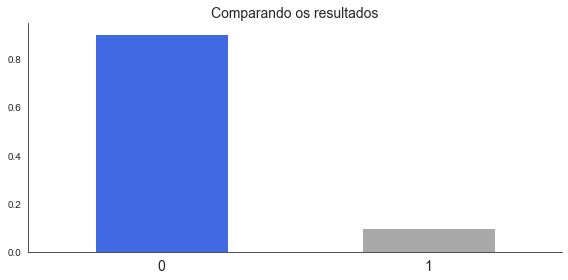

In [10]:
# verificando variavel alvo
print(f"{covid_df['SARS_Cov_2_exam_result'].value_counts(normalize=True)}\n\n")

# gráfico
fig, ax = plt.subplots(figsize=(8,4))
covid_df['SARS_Cov_2_exam_result'].value_counts(normalize=True).plot(kind='bar',
                                                                     color=['royalblue','darkgrey'],
                                                                     ax=ax)
ax.set_title("Comparando os resultados", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

Conclusões acerca do grafico:
* aproximadamente 90% das nossas observações testaram negativas para SARS-Cov-2. O restante aproximadamente 10% testaram positivos;
* O gráfico de barras mostra como essa discrepância se torna nítida e visível. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

Vamos ver agora como está a contagem de exames para pessoas que testaram negativas e positivas. 

In [11]:
covid_df.groupby('SARS_Cov_2_exam_result').count().T

SARS_Cov_2_exam_result,0,1
Patient_ID,5086,558
Patient_age_quantile,5086,558
Patient_addmited_to_regular_ward__1_yes__0_no_,5086,558
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,5086,558
Patient_addmited_to_intensive_care_unit__1_yes__0_no_,5086,558
Hematocrit,520,83
Hemoglobin,520,83
Platelets,519,83
Mean_platelet_volume_,518,81
Red_blood_Cells,519,83


## Mapa de calor
Um mapa de calor é uma representação gráfica em que valores individuais de uma matriz são representados como cores. Um mapa de calor é muito útil para visualizar a concentração de valores entre duas dimensões de uma matriz. Isso ajuda a encontrar padrões e fornece uma perspectiva de profundidade.


In [12]:
corr = covid_df.corr()

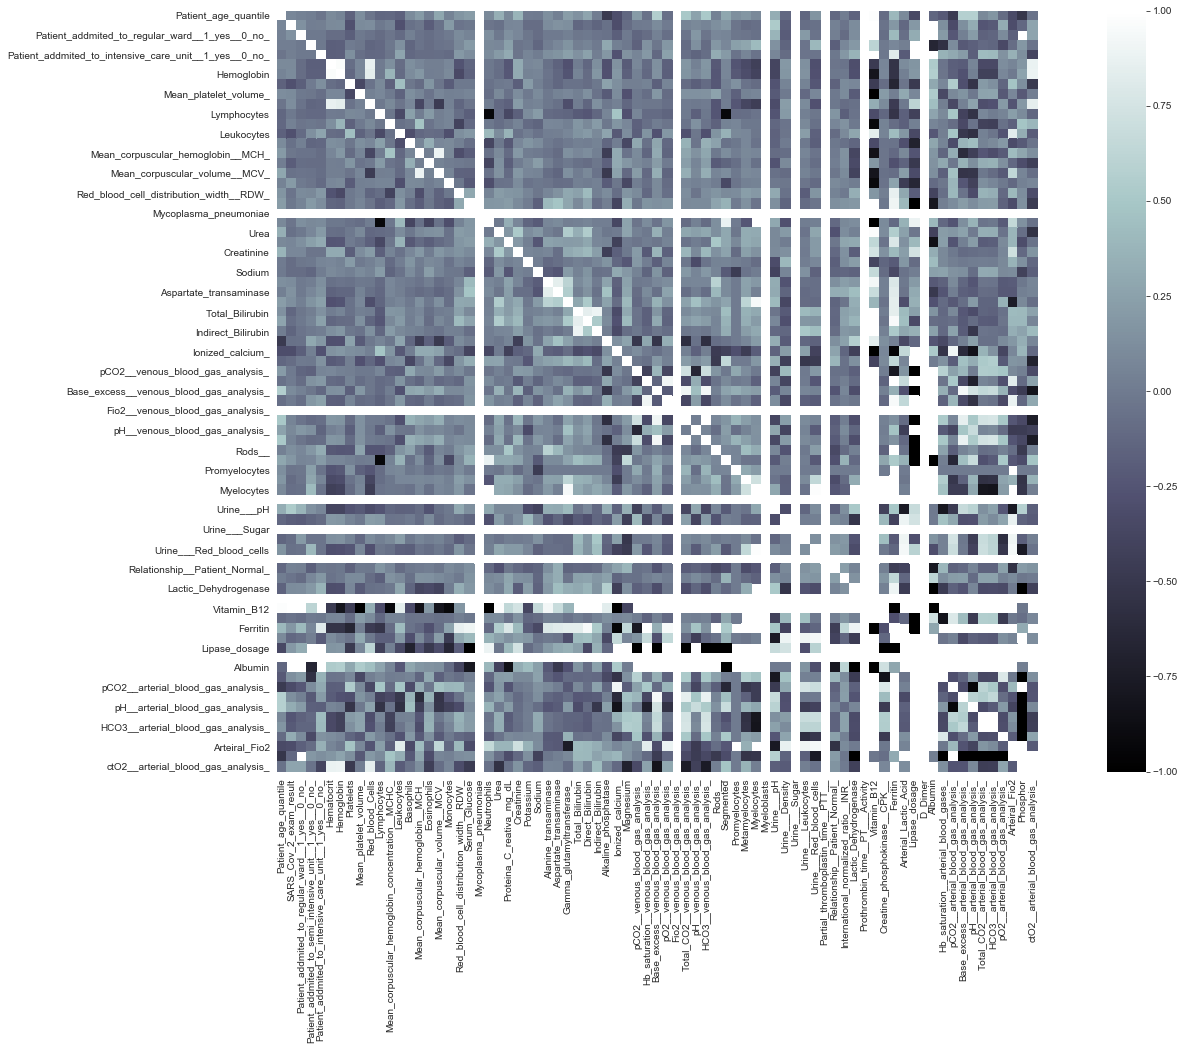

In [13]:
fig, ax = plt.subplots(figsize=(25,14))
sns.heatmap(corr, cmap='bone', square=True, linecolor='white')

Observe como o desbalanceamento dos dados na matriz de correlação não traz nenhuma informação relevante.

# Preparação dos Dados
Com as informações que obtivemos da etapa anterior, vamos prosseguir com a limpeza e preparação dos dados.
* Vamos categorizar nossos dados
* Vamos pegar so as pessoas que possuem os exames, vamos excluir todo o resto.

In [14]:
# dados sem a variavel alvo
X = covid_df.iloc[:, 6:]
X.head()

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_,Serum_Glucose,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma_pneumoniae,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Neutrophils,Urea,Proteina_C_reativa_mg_dL,Creatinine,Potassium,Sodium,Influenza_B__rapid_test,Influenza_A__rapid_test,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyltransferase_,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_phosphatase,Ionized_calcium_,Strepto_A,Magnesium,pCO2__venous_blood_gas_analysis_,Hb_saturation__venous_blood_gas_analysis_,Base_excess__venous_blood_gas_analysis_,pO2__venous_blood_gas_analysis_,Fio2__venous_blood_gas_analysis_,Total_CO2__venous_blood_gas_analysis_,pH__venous_blood_gas_analysis_,HCO3__venous_blood_gas_analysis_,Rods__,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine___Esterase,Urine___Aspect,Urine___pH,Urine___Hemoglobin,Urine___Bile_pigments,Urine___Ketone_Bodies,Urine___Nitrite,Urine___Density,Urine___Urobilinogen,Urine___Protein,Urine___Sugar,Urine___Leukocytes,Urine___Crystals,Urine___Red_blood_cells,Urine___Hyaline_cylinders,Urine___Granular_cylinders,Urine___Yeasts,Urine___Color,Partial_thromboplastin_time__PTT__,Relationship__Patient_Normal_,International_normalized_ratio__INR_,Lactic_Dehydrogenase,Prothrombin_time__PT___Activity,Vitamin_B12,Creatine_phosphokinase__CPK__,Ferritin,Arterial_Lactic_Acid,Lipase_dosage,D_Dimer,Albumin,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [26]:
kf = KFold(5, shuffle=True, random_state=0)

In [16]:
from category_encoders import OrdinalEncoder

In [27]:
# categorizando as variaveis object
cats = X.select_dtypes(include=object).columns.tolist()

In [28]:
# Dados somente de pessoas com exames
full_nan = X.isnull().mean(axis=1) == 1
X = X[~full_nan]
covid_df = covid_df[~full_nan]

# Criando modelo

Vamos dividir nossos dados para Treino e Teste e aplicar lightGBM

In [31]:
for tr, ts in kf.split(X):
    Xtrain = X.iloc[tr]
    Xtest = X.iloc[ts]
    ytrain = covid_df.iloc[tr]['SARS_Cov_2_exam_result']
    ytest = covid_df.iloc[ts]['SARS_Cov_2_exam_result']
    
    

    # fazendo o encoding das variaveis
    enc = OrdinalEncoder(cols=cats)
    Xtrain = enc.fit_transform(Xtrain)
    Xtest = enc.transform(Xtest)
    

    
    lgbm_clf = LGBMClassifier(random_state=200, class_weight='balanced', n_estimators=100, 
                         learning_rate=0.009, num_leaves=2**3)
    lgbm_clf.fit(Xtrain, ytrain)
    
    p = lgbm_clf.predict_proba(Xtest)[:,1]
    
    print("AUC= ", roc_auc_score(ytest,p))

AUC=  0.7968536251709986
AUC=  0.7158119658119658
AUC=  0.7399473566308243
AUC=  0.8063512731481481
AUC=  0.719407192928985


O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

Tivemos um bom resultado, mas que pode ser melhorado.



In [29]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [32]:
explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(Xtrain)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


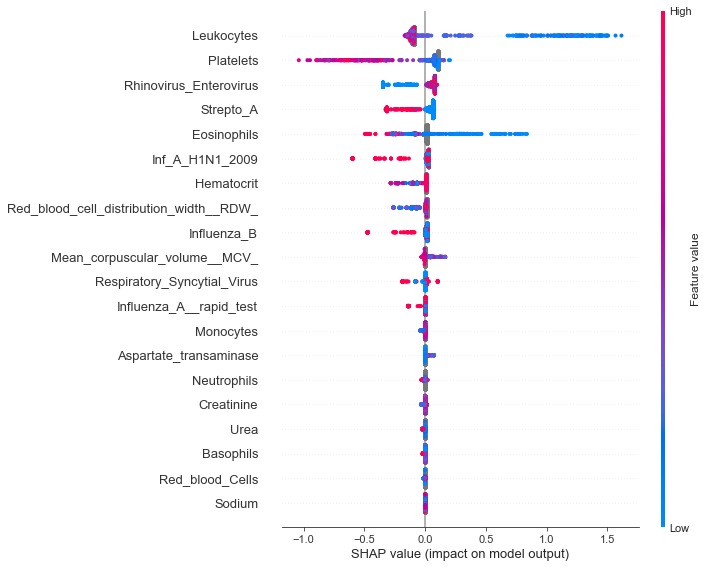

In [33]:
shap.summary_plot(shap_values[1], Xtrain)


Conclusões:
* Nosso gráfico apresenta em ordem a feature(varíavel) mais importante para a menos importante.
> Temos `Leukocytes` como a varíavel mais importante para detectar se a pessoa tem a covid-19 ou não para o nosso modelo. Assim quanto menor seu valor maior a probabilidade do teste dar positivo. 

* A partir desses resultados pode-se fazer quem sabe uma engenharia reversa da decisão do médico de pedir exames.

